## Hello, Self!
### Let's forget about  "Hello, World!" for a while, today we will talk about Mental Health in Tech Companies

#### Dataset were taken from Kaggle, these are results from some yearly survey regarding Mental Health in Tech Companies held by OSMI. I will use the data from 2017 and 2018.
#### OSMI ( Open Sourcing Mental Illness)  is a non-profit, corporation dedicated to raising awareness, educating, and providing resources to support mental wellness in the tech and open source communities.

#### OSMI began in 2013, with Ed Finkler speaking at tech conferences about his personal experiences as a web developer and open source advocate with a mental health disorder.

#### I aim to predict mental health state by putting 'Do you currently have a mental health disorder?' question as the target. Although the answers for this question are definitive "yes", "no", and somewhere in between, I'd like to make this prediction as a risk identificator only. This could be useful for HRs and can be used during recruitment process or people who give concern about their mental state.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
mental2018 = pd.read_csv('OSMI Mental Health in Tech Survey 2018.csv')
mental2017 = pd.read_csv('OSMI Mental Health in Tech Survey 2017.csv')

pd.set_option('display.max_columns', 200)

### Let's check whether we can concat these two DF or not

In [3]:
datafeat,datafeat17, datatype,datatype17, nullpct17,nullpct,unique,unique17,uniquesamp = [],[],[],[],[],[],[],[],[]
for item in mental2018.columns:
    datafeat.append(item)
    datatype.append(mental2018[item].dtype)
    nullpct.append(round(((mental2018[item].isnull().sum() / len(mental2018))*100),2))
    unique.append(len(mental2018[item].unique()))

for item in mental2017.columns:
    datafeat17.append(item)
    datatype17.append(mental2017[item].dtype)
    nullpct17.append(round(((mental2017[item].isnull().sum() / len(mental2017))*100),2))
    unique17.append(len(mental2017[item].unique()))


dictx = {
    'dataFeatures2018' : datafeat,
    'Features2017' : datafeat17,
    'dataType2018' : datatype,
    'dataType2017' : datatype17,
    'nullPct2018' : nullpct,
    'nullPct2017' : nullpct17, 
    'unique2018' : unique,
    'unique2017' : unique17
}

pd.DataFrame(dictx)

,dataFeatures2018,Features2017,dataType2018,dataType2017,nullPct2018,nullPct2017,unique2018,unique2017
0,#,#,object,object,0.00,0.00,417,756
1,<strong>Are you self-employed?</strong>,<strong>Are you self-employed?</strong>,int64,int64,0.00,0.00,2,2
2,How many employees does your company or organi...,How many employees does your company or organi...,object,object,13.43,14.95,7,7
3,Is your employer primarily a tech company/orga...,Is your employer primarily a tech company/orga...,float64,float64,13.43,14.95,3,3
4,Is your primary role within your company relat...,Is your primary role within your company relat...,float64,float64,13.43,14.95,3,3
5,Does your employer provide mental health benef...,Does your employer provide mental health benef...,object,object,13.43,14.95,5,5
6,Do you know the options for mental health care...,Do you know the options for mental health care...,object,object,22.30,23.81,3,3
7,Has your employer ever formally discussed ment...,Has your employer ever formally discussed ment...,object,object,13.43,14.95,4,4
8,Does your employer offer resources to learn mo...,Does your employer offer resources to learn mo...,object,object,13.43,14.95,4,4
9,Is your anonymity protected if you choose to t...,Is your anonymity protected if you choose to t...,object,object,13.43,14.95,4,4


In [4]:
frames = [mental2017,mental2018]
mental = pd.concat(frames)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [5]:
mental.shape


(1173, 127)

In [6]:
mental.columns

Index(['#', '<strong>Are you self-employed?</strong>',
       '<strong>Do you have previous employers?</strong>',
       '<strong>Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?</strong>',
       '<strong>Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?</strong>',
       '<strong>Have your previous employers provided mental health benefits?</strong>',
       '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?</strong>',
       '<strong>If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?</strong>',
       '<strong>Were you aware of the options for mental health care provided by your previous employers?</strong>',
       '<strong>Would you have been willing to discuss y

#### It seems like some columns were accidently duplicated during the process

## Data Cleaning

#### Some column names came straight from HTML ,we're going to convert them to normal alphabet

In [7]:
import re

In [8]:
mental.rename(columns=lambda colname: re.sub('</\w+>', '', colname), inplace=True)
mental.rename(columns=lambda colname: re.sub('<\w+>', '', colname), inplace=True)

In [9]:
cols = mental.columns.tolist()


#### Here's our target column, and the value count:

In [10]:
mental.columns.get_loc('Do you currently have a mental health disorder?')

38

In [11]:
mental['Do you currently have a mental health disorder?'].value_counts()

Yes           515
No            334
Possibly      226
Don't Know     98
Name: Do you currently have a mental health disorder?, dtype: int64

#### We have our first column duplication, where we got two exact column name, but here we found the content were split in half. If the other one is NaN, the other one is filled and vice versa. I'm going to combine them using conditional if and move them to new column, after that I'm going to drop both of the duplicates

In [12]:
overlapcol = mental["If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively (i.e., when you are experiencing symptoms)?"].fillna('')

In [13]:
li=[]
for item in overlapcol.values:
    if item[1] == '':
        li.append(item[0])
    else:
        li.append(item[1])

mental['If you have a mental health disorder, how often do you feel that it interferes with your work'] = li


In [14]:
mental['If you have a mental health disorder, how often do you feel that it interferes with your work'] = li

In [15]:
mental.drop("If you have a mental health disorder, how often do you feel that it interferes with your work when NOT being treated effectively (i.e., when you are experiencing symptoms)?",axis=1,inplace=True)

In [16]:
datafeature, datatype,nullpct,unique = [],[],[],[]
for item in mental.columns:
    datafeature.append(item)
    datatype.append(mental[item].dtype)
    nullpct.append(round(((mental[item].isnull().sum() / len(mental))*100),2))
    unique.append(len(mental[item].unique()))




dictmental = {
    'dataFeatures' : datafeature,
    'dataType' : datatype,
    'nullPct' : nullpct,
    'unique' : unique
}

mentalinfo = pd.DataFrame(dictmental)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)
mentalinfo

,dataFeatures,dataType,nullPct,unique
0,#,object,0.00,1173
1,Are you self-employed?,int64,0.00,2
2,Do you have previous employers?,int64,0.00,2
3,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,object,0.17,6
4,Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?,object,0.17,6
5,Have your previous employers provided mental health benefits?,object,12.19,5
6,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?",object,85.59,6
7,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",object,85.59,6
8,Were you aware of the options for mental health care provided by your previous employers?,object,12.19,6
9,Would you have been willing to discuss your mental health with your coworkers at previous employers?,object,12.19,5


#### Next, I'm going to drop some columns that have more than 50% NaN but with unique values not more than 21. For columns with hundreds unique values, I'm going to save them for NLP because they represent answers for open questions.

In [17]:
colsdel= mentalinfo[(mentalinfo['nullPct']>50) & (mentalinfo['unique']<21)]['dataFeatures'].tolist()
colsdel

['If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
 'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
 'Addictive Disorder',
 'Addictive Disorder.1',
 'Addictive Disorder.2',
 'Anxiety Disorder (Generalized, Social, Phobia, etc)',
 'Anxiety Disorder (Generalized, Social, Phobia, etc).1',
 'Anxiety Disorder (Generalized, Social, Phobia, etc).2',
 'Attention Deficit Hyperactivity Disorder',
 'Attention Deficit Hyperactivity Disorder.1',
 'Attention Deficit Hyperactivity Disorder.2',
 'Describe the circumstances of the supportive or well handled response.',
 'Dissociative Disorder',
 'Dissociative Disorder.1',
 'Dissociative Disorder.2',
 'Do you believe your productivity is ever affected by a mental health issue?',
 'Do you have medical coverage (private insurance or state-provided) that includes treatment of mental health disorders?',
 'Do

In [18]:
mental = mental.drop(columns=colsdel,axis=1)


In [19]:
datafeature, datatype,nullpct,unique = [],[],[],[]
for item in mental.columns:
    datafeature.append(item)
    datatype.append(mental[item].dtype)
    nullpct.append(round(((mental[item].isnull().sum() / len(mental))*100),2))
    unique.append(len(mental[item].unique()))
dictmental = {
    'dataFeatures' : datafeature,
    'dataType' : datatype,
    'nullPct' : nullpct,
    'unique' : unique
}
mentalinfo = pd.DataFrame(dictmental)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)

In [20]:
tobefeatures = mentalinfo[mentalinfo['unique']<89]['dataFeatures'].tolist()
toNLP = mentalinfo[mentalinfo['unique']>89]['dataFeatures'].tolist()

In [21]:
mentalNLP = mental.drop(columns=tobefeatures,axis=1)
mentalNLP ['Do you currently have a mental health disorder?']= mental['Do you currently have a mental health disorder?']
mentalfeats = mental.drop(columns=toNLP,axis=1)
mentalNLP.to_csv('mentalNLP.csv')

####  For "what is your age", I'm going to bin them into specific categories, but since we're looking forward to identify someone who has mental health disorder rather than people that are healthy, I'm going to check from which group age that has significant amount of people who has mental health disorder

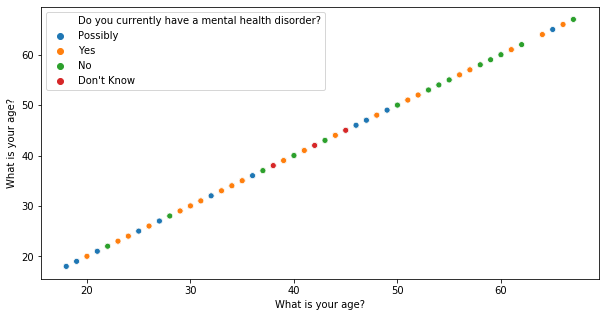

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot( data=mentalfeats, x='What is your age?', y='What is your age?', hue='Do you currently have a mental health disorder?')


In [23]:
mentalfeats['Do you currently have a mental health disorder?'].unique()

array(['Possibly', 'Yes', 'No', "Don't Know"], dtype=object)

In [24]:
# sns.distplot(mentalfeats[mentalfeats['Do you currently have a mental health disorder?']=='Possibly']['What is your age?'].dropna(),label='Possibly')
# sns.distplot(mentalfeats[mentalfeats['Do you currently have a mental health disorder?']=='Yes']['What is your age?'].dropna(),label='Yes')
# sns.distplot(mentalfeats[mentalfeats['Do you currently have a mental health disorder?']=='No']['What is your age?'].dropna(),label='No')
# sns.distplot(mentalfeats[mentalfeats['Do you currently have a mental health disorder?']=="Don't Know"]['What is your age?'].dropna(),label="Don't Know")
# plt.legend()

In [25]:
mentalfeats.index = range(1173)
mentalfeats[mentalfeats['What is your age?'].isna()==True].index
mentalfeats.drop([753, 755], inplace=True)
mentalfeats.index = range(1171)

for item in range(len(mentalfeats['What is your age?'])):
    if (mentalfeats['What is your age?'][item]<25):
        mentalfeats['What is your age?'][item]='Less than 25yo'
    elif ((mentalfeats['What is your age?'][item]>=25)&(mentalfeats['What is your age?'][item]<=30)):
        mentalfeats['What is your age?'][item]='Between 25-30'
    elif ((mentalfeats['What is your age?'][item]>=31)&(mentalfeats['What is your age?'][item]<=35)):
        mentalfeats['What is your age?'][item]='Between 31-35'
    elif ((mentalfeats['What is your age?'][item]>=36)&(mentalfeats['What is your age?'][item]<=40)):
        mentalfeats['What is your age?'][item]='Between 36-40'
    elif ((mentalfeats['What is your age?'][item]>=41)&(mentalfeats['What is your age?'][item]<=50)): 
        mentalfeats['What is your age?'][item]='Between 41-50'
    else:
        mentalfeats['What is your age?'][item]='Above 50'






D:\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\anaconda\lib\site-packages\ipykernel_launcher.py:14: SettingW

In [26]:
mentalfeats['What is your age?'].value_counts()

Between 25-30     304
Between 31-35     282
Between 36-40     240
Between 41-50     203
Less than 25yo    86 
Above 50          56 
Name: What is your age?, dtype: int64

#### I'm going to do cleaning for "What is your gender" question, some people filled it with sub gender category, I'm simplifying them into :
> ##### For anything with the word "male" I'm going to label them as Male
> ##### For anything with the word "female" I'm going to group them as Female
> ##### For everything other than that I'm going to group them as other

In [27]:
mentalfeats[mentalfeats['What is your gender?'].isna()==True].index
mentalfeats.drop([33, 38, 124, 142, 201, 311, 339, 472, 493, 548, 719, 797, 951,
            964], inplace=True)
mentalfeats.index = range(1157)

In [28]:
for item in range(len(mentalfeats['What is your gender?'])):
    if any(x in mentalfeats['What is your gender?'][item].lower() for x in ['female', 'f','woman']):
        mentalfeats['What is your gender?'][item]='Female'  
    elif any(x in mentalfeats['What is your gender?'][item].lower() for x in ['male', 'm','man']) : 
        mentalfeats['What is your gender?'][item]='Male'
    else:
        mentalfeats['What is your gender?'][item]='Other'


D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [29]:
mentalfeats['What is your gender?'].value_counts()

Male      776
Female    359
Other     22 
Name: What is your gender?, dtype: int64

In [30]:
datafeature, datatype,nullpct,unique = [],[],[],[]
for item in mentalfeats.columns:
    datafeature.append(item)
    datatype.append(mentalfeats[item].dtype)
    nullpct.append(round(((mentalfeats[item].isnull().sum() / len(mentalfeats))*100),2))
    unique.append(len(mentalfeats[item].unique()))




dictmental = {
    'dataFeatures' : datafeature,
    'dataType' : datatype,
    'nullPct' : nullpct,
    'unique' : unique
}

mentalfeatsinfo = pd.DataFrame(dictmental)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)
mentalfeatsinfo

,dataFeatures,dataType,nullPct,unique
0,Are you self-employed?,int64,0.00,2
1,Do you have previous employers?,int64,0.00,2
2,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,object,0.00,5
3,Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?,object,0.00,5
4,Have your previous employers provided mental health benefits?,object,12.19,5
5,Were you aware of the options for mental health care provided by your previous employers?,object,12.19,6
6,Would you have been willing to discuss your mental health with your coworkers at previous employers?,object,12.19,5
7,Are you openly identified at work as a person with a mental health issue?,float64,0.00,2
8,Did you ever discuss your mental health with a previous coworker(s)?,float64,12.36,3
9,Did you ever discuss your mental health with your previous employer?,float64,12.19,3


#### To simplify ,I'm going to remove columns that has less correlation. I'm about to check them with EDA

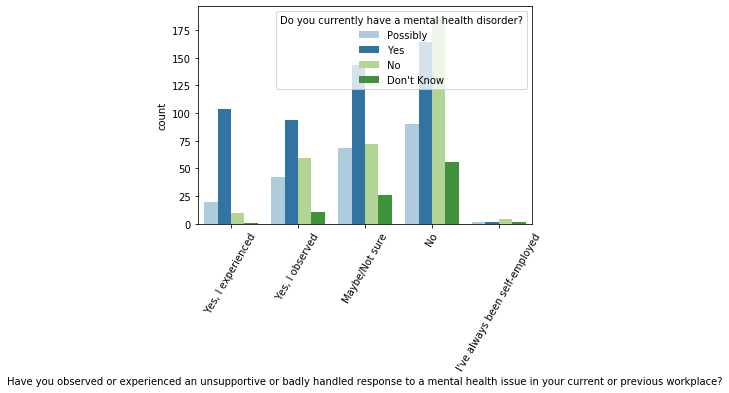

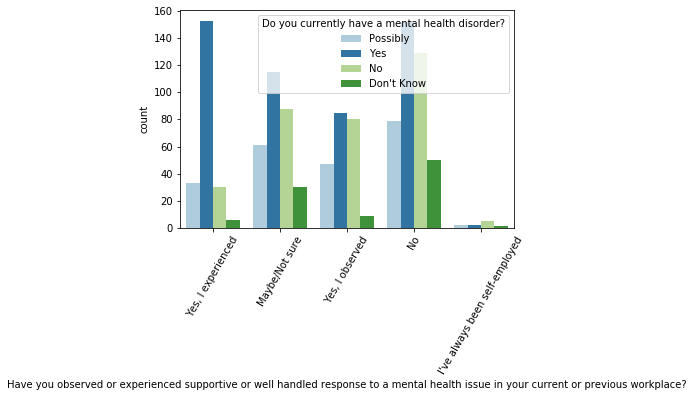

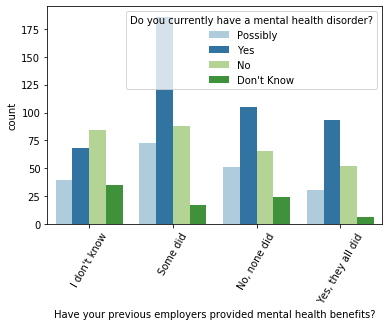

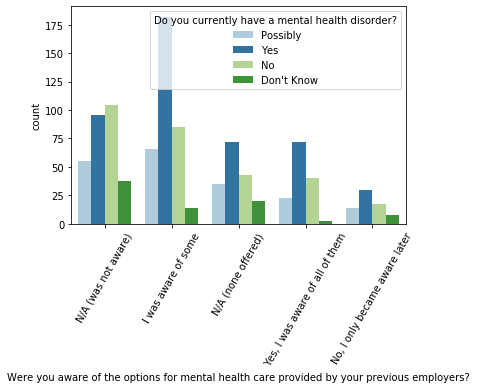

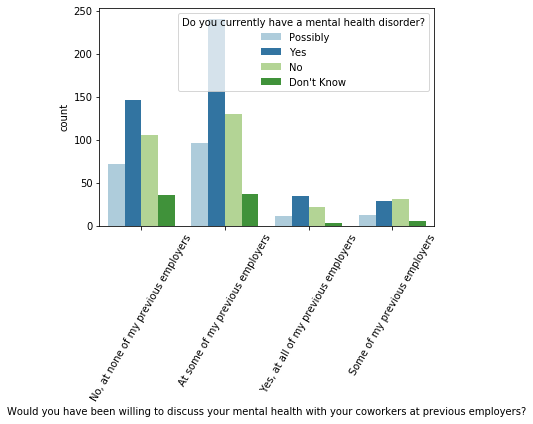

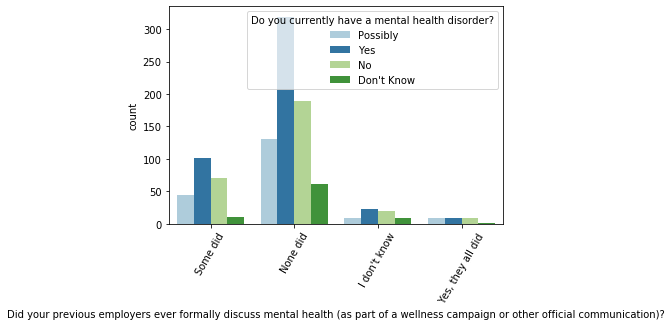

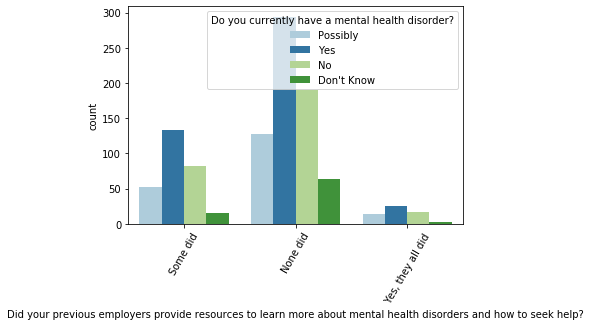

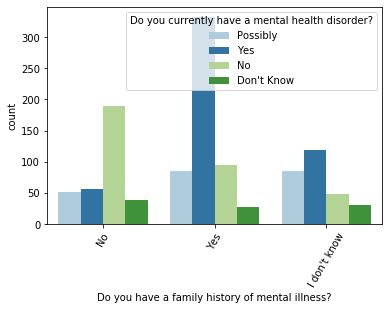

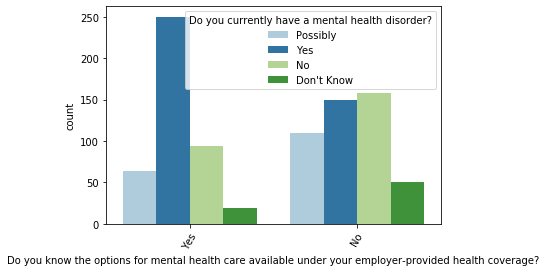

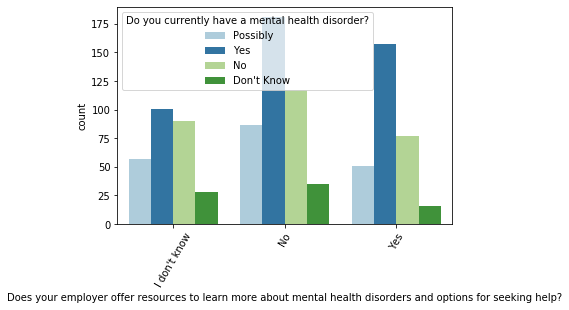

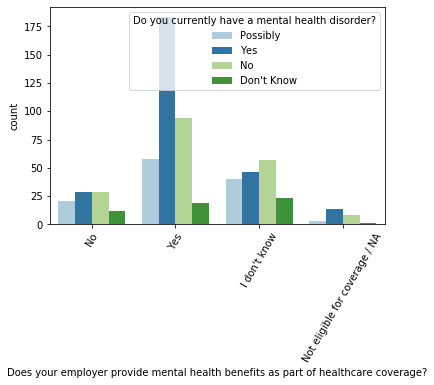

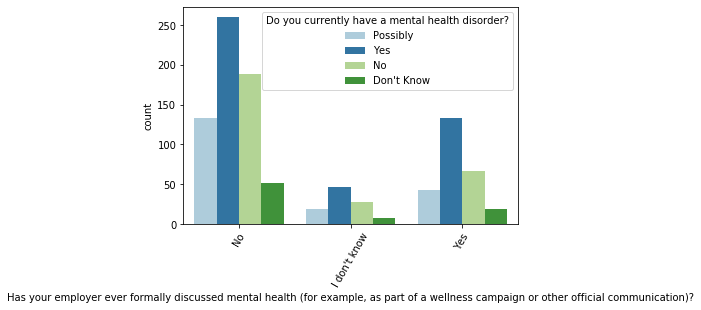

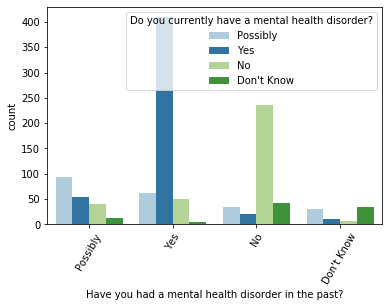

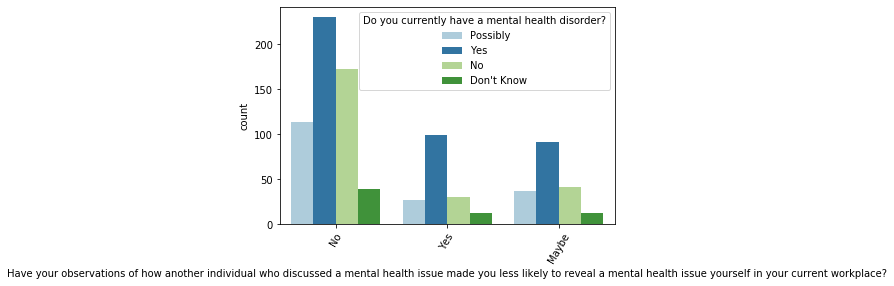

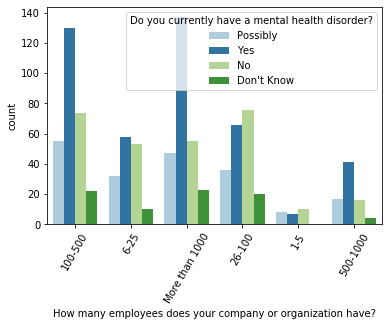

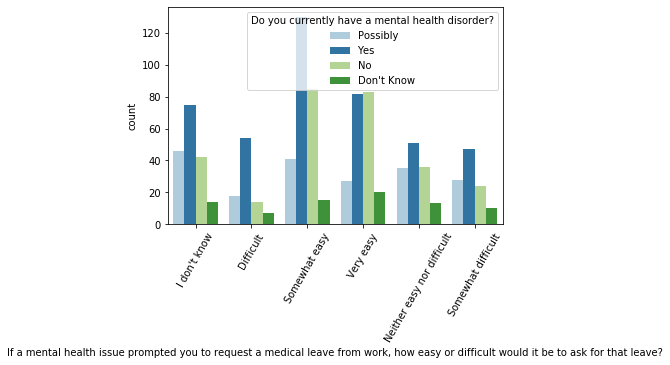

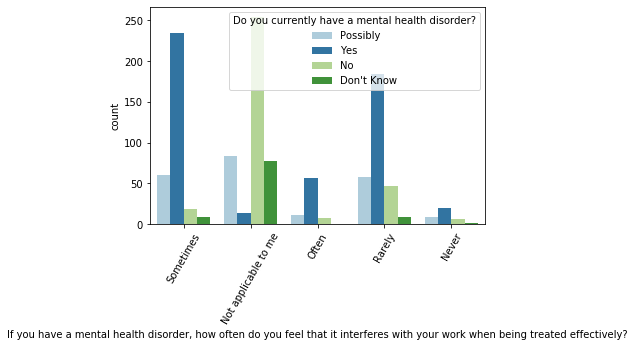

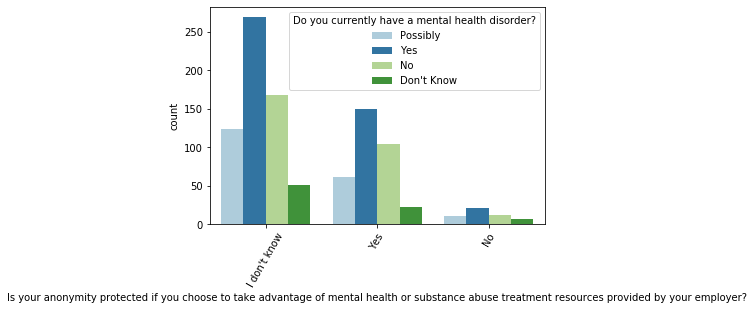

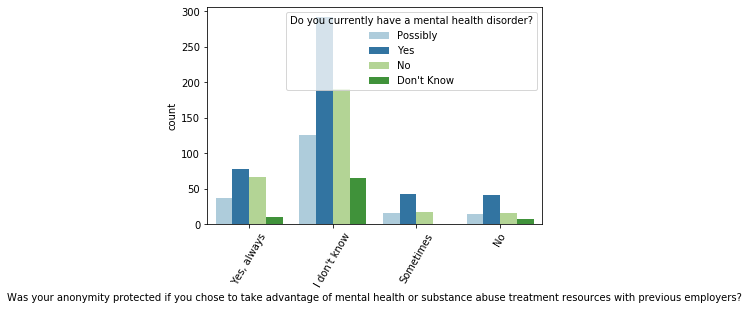

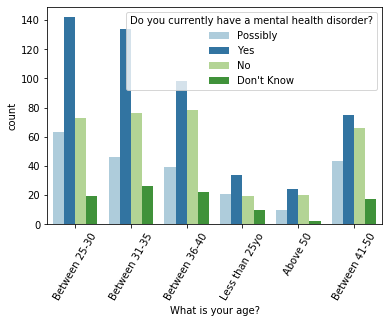

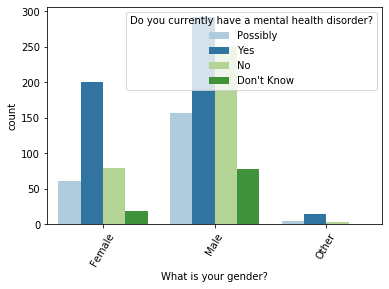

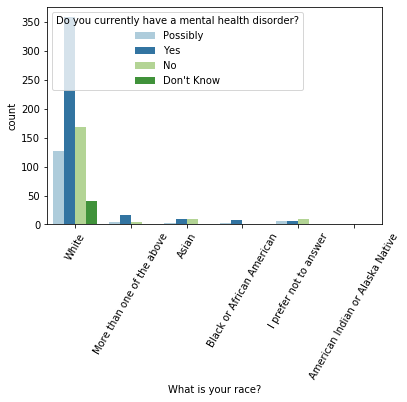

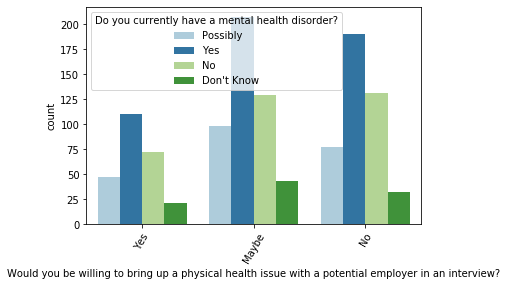

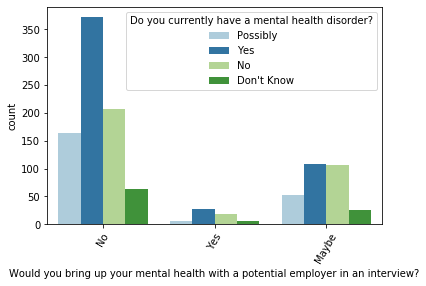

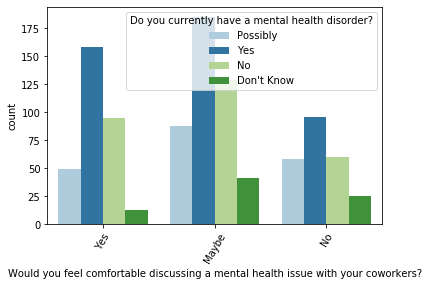

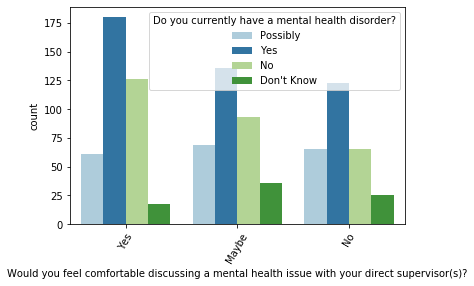

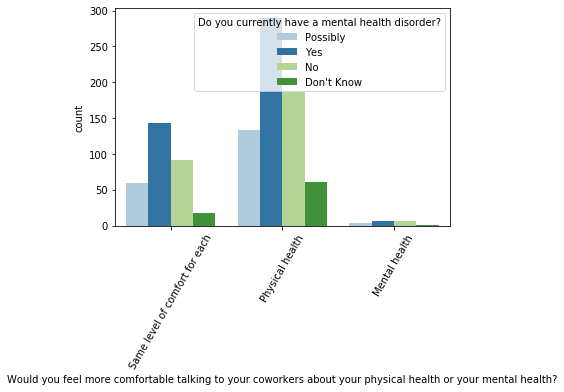

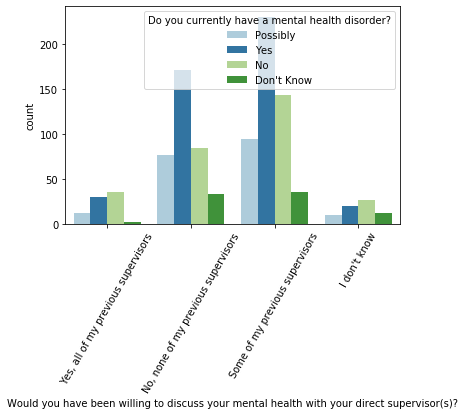

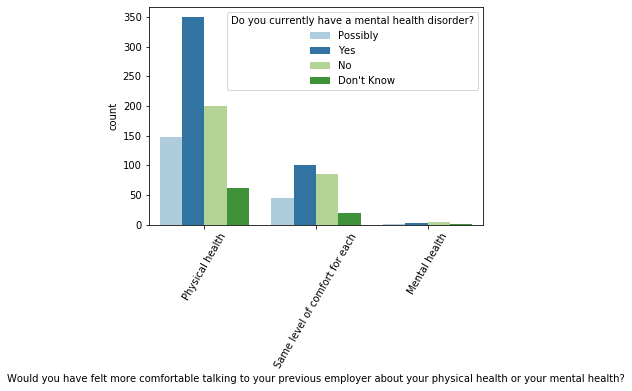

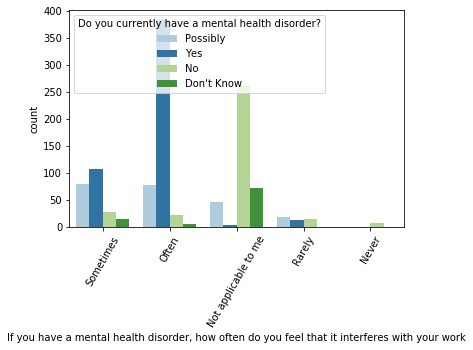

In [109]:
categorical_columns = mentalfeats.select_dtypes(include='O').drop(['Do you currently have a mental health disorder?','What country do you work in?','What country do you live in?','What US state or territory do you work in?','What US state or territory do you live in?'],axis=1).columns
for item in categorical_columns:
    a= sns.countplot(data=mentalfeats, x=item , hue='Do you currently have a mental health disorder?', palette="Paired")
    a.set_xticklabels(a.get_xticklabels(),rotation=60)
    plt.show()

In [32]:
len(categorical_columns)

30

#### Skimming 30 columns with bare eyes will leave a room for error, I'm going to translate it into a code. Basically I'm trying to find columns that have significant difference in population that answered "yes" for the question "'Do you currently have a mental health disorder?'. I took personal judgement that score more than 0.40 alone can be considered as significant, leaving 0.60 to the other 3 answer probabilities

In [33]:
listpersenpositif = []
for item in categorical_columns:
    a=(mentalfeats[mentalfeats['Do you currently have a mental health disorder?']=='Yes'][item].mode())
    jumlahmode = len(mentalfeats[mentalfeats[item]==a[0]])
    percmode = jumlahmode/len(mentalfeats[item])
    print(item)
    print(percmode)
    if percmode>0.40:
        listpersenpositif.append(item)


Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
0.42955920484010374
Have you observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace?
0.19187554019014694
Have your previous employers provided mental health benefits?
0.3146067415730337
Were you aware of the options for mental health care provided by your previous employers?
0.2999135695764909
Would you have been willing to discuss your mental health with your coworkers at previous employers?
0.43560933448573896
Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?
0.6050129645635264
Did your previous employers provide resources to learn more about mental health disorders and how to seek help?
0.5834053586862575
Do you have a family history of mental illness?
0.4658599827139153
Do you know the options for me

##### I'm adding "What is your age" which now has converted into categorical

In [34]:
listpersenpositif.append('What is your age?')


In [35]:
mentalfeatsbeforecleanNAN = mentalfeats[listpersenpositif]
datafeature, datatype,nullpct,unique = [],[],[],[]
for item in mentalfeatsbeforecleanNAN.columns:
    datafeature.append(item)
    datatype.append(mentalfeatsbeforecleanNAN[item].dtype)
    nullpct.append(round(((mentalfeatsbeforecleanNAN[item].isnull().sum() / len(mentalfeatsbeforecleanNAN))*100),2))
    unique.append(len(mentalfeatsbeforecleanNAN[item].unique()))
dictmental = {
    'dataFeatures' : datafeature,
    'dataType' : datatype,
    'nullPct' : nullpct,
    'unique' : unique
}

mentaltobecleaned = pd.DataFrame(dictmental)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)
mentaltobecleaned

,dataFeatures,dataType,nullPct,unique
0,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,object,0.00,5
1,Would you have been willing to discuss your mental health with your coworkers at previous employers?,object,12.19,5
2,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,object,12.19,5
3,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,object,12.19,4
4,Do you have a family history of mental illness?,object,0.00,3
5,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",object,13.83,4
6,Have you had a mental health disorder in the past?,object,1.04,5
7,Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,object,21.87,4
8,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,object,13.83,4
9,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,object,12.19,5


#### Last for categorical, I'm going to fill the NaN with new category which is "Choosed not to fill". I'm doing that because NaN value avg are only around 10 percent, I'm not going to use "What is your race" to make this survey more flexible to be used in another continent and countries.
#### The other concern, I only have data from 1156 respondents so deleting will make big impact to data volume.

In [36]:
mentalfeatsbeforecleanNAN['Do you currently have a mental health disorder?'] =mentalfeats['Do you currently have a mental health disorder?']
mentalfeatsclean = mentalfeatsbeforecleanNAN.fillna('Choosed not to fill')
mentalfeatsclean.tail(1)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,Would you have been willing to discuss your mental health with your coworkers at previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,Do you have a family history of mental illness?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Have you had a mental health disorder in the past?,Have your observations of how another individual who discussed a mental health issue made you less likely to reveal a mental health issue yourself in your current workplace?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,What is your gender?,What is your race?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Would you bring up your mental health with a potential employer in an interview?,Would you feel more comfortable talking to your coworkers about your physical health or your mental health?,Would you have been willing to discuss your mental health with your direct supervisor(s)?,Would you have felt more comfortable talking to your previous employer about your physical health or your mental health?,"If you have a mental health disorder, how often do you feel that it interferes with your work",What is your age?,Do you currently have a mental health disorder?
1156,"Yes, I observed",At some of my previous employers,None did,Some did,I don't know,No,Yes,No,Yes,"Yes, always",Male,White,No,No,Same level of comfort for each,Some of my previous supervisors,Physical health,Often,Between 31-35,Yes


#### Now for correlation in numeric columns :

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


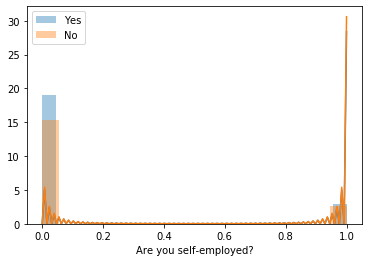

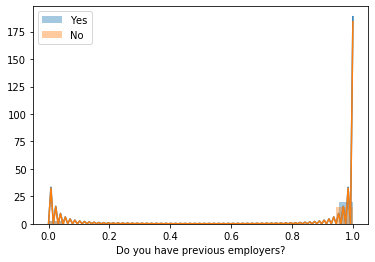

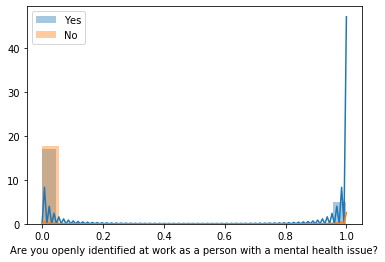

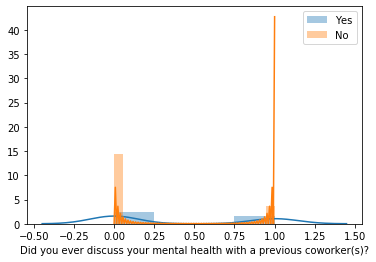

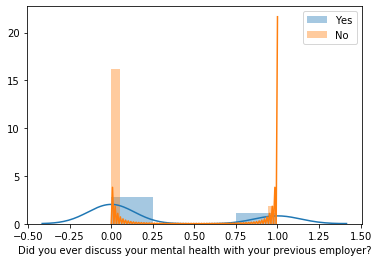

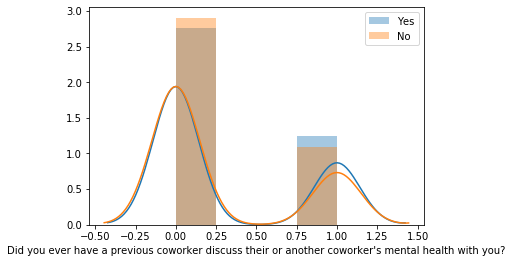

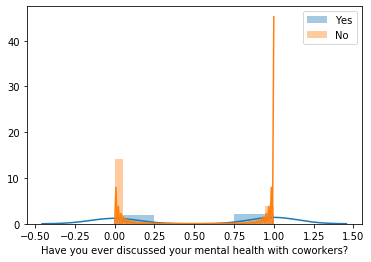

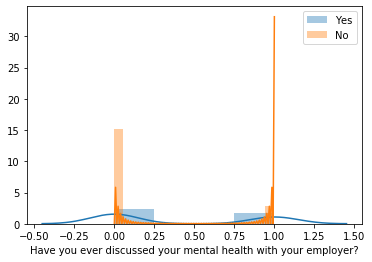

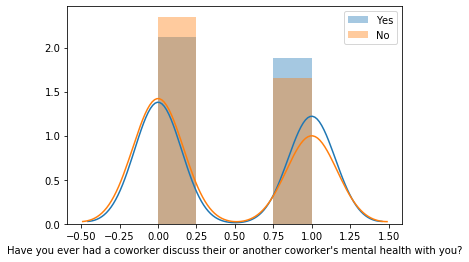

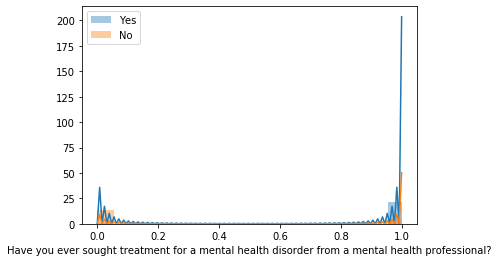

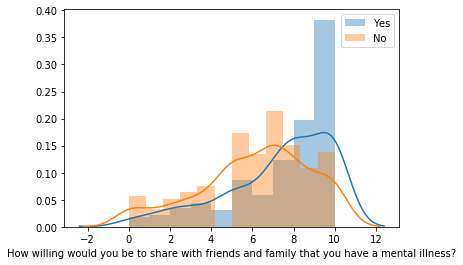

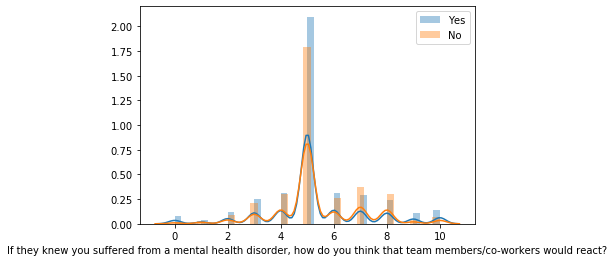

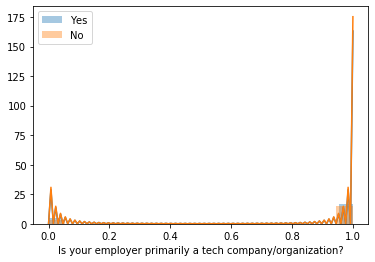

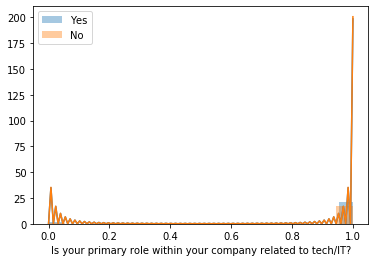

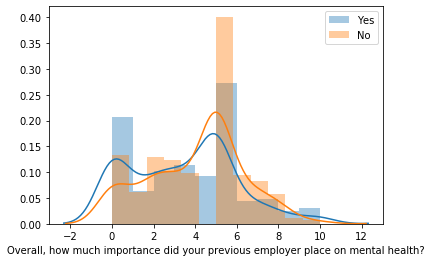

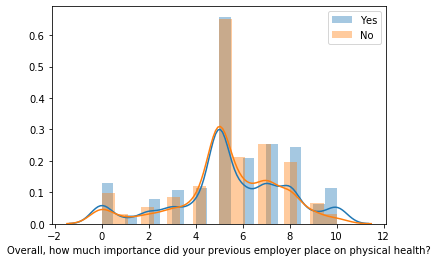

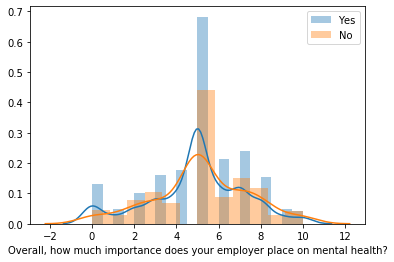

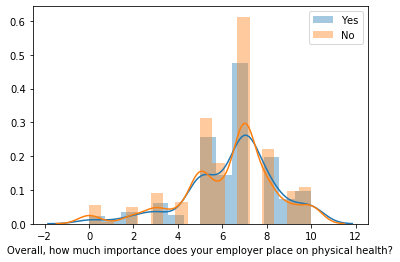

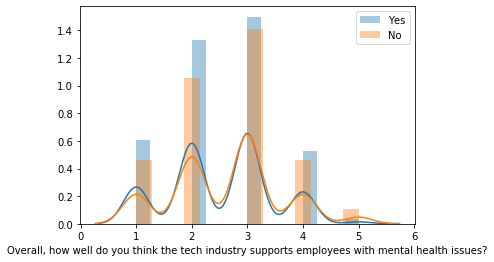

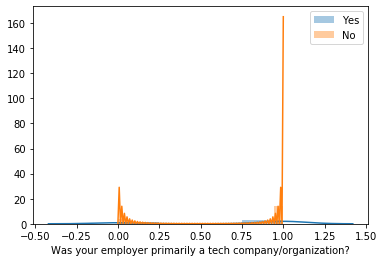

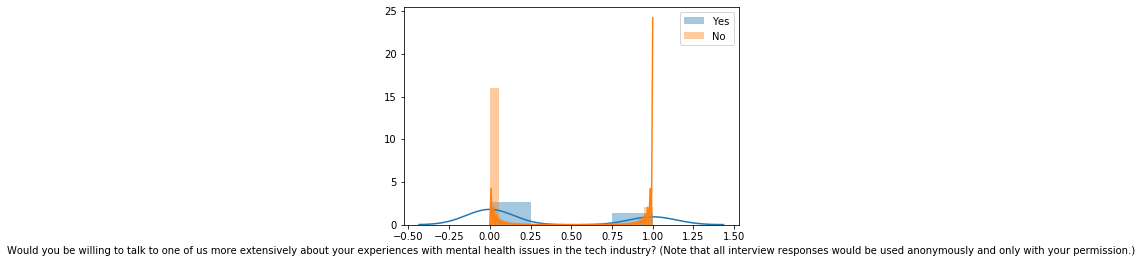

D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


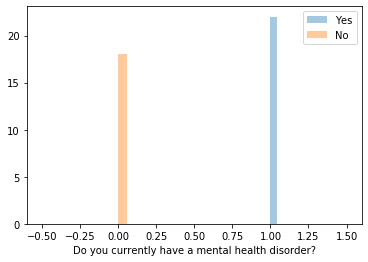

In [111]:
x = mentalfeatsclean['Do you currently have a mental health disorder?'].map({'Yes' : 1,'No' : 0,'Possibly' :2,"Don't Know":3})
numeric_columns = mentalfeats.select_dtypes(exclude='O').columns
mentalnumeriks = mentalfeats[numeric_columns]
xx = x.tolist()
mentalnumeriks['Do you currently have a mental health disorder?']=xx
for item in mentalnumeriks.columns:
    mentalnumeriks[item].fillna(mentalnumeriks[item].mode()[0], inplace=True)
for item in mentalnumeriks.columns:
    fig,ax = plt.subplots(nrows=1,ncols=1)
    sns.distplot(mentalnumeriks[mentalnumeriks['Do you currently have a mental health disorder?'] == 1][item] , ax=ax, label='Yes')
    sns.distplot(mentalnumeriks[mentalnumeriks['Do you currently have a mental health disorder?'] == 0][item] , ax=ax, label='No')
    plt.legend()
    plt.show()

#### To identify correlation with target, the target column changed into numeric and since I'm aiming for positive mental disorder, I used get dummies so later I can do specific Iloc for that

In [38]:
this = pd.get_dummies(mentalnumeriks['Do you currently have a mental health disorder?'],columns=['No','Yes','Possibly',"Don't Know"])
mentalnumeriks = mentalnumeriks.drop('Do you currently have a mental health disorder?',axis=1)
df = pd.concat([this,mentalnumeriks], axis=1)
df.head()


,0,1,2,3,Are you self-employed?,Do you have previous employers?,Are you openly identified at work as a person with a mental health issue?,Did you ever discuss your mental health with a previous coworker(s)?,Did you ever discuss your mental health with your previous employer?,Did you ever have a previous coworker discuss their or another coworker's mental health with you?,Have you ever discussed your mental health with coworkers?,Have you ever discussed your mental health with your employer?,Have you ever had a coworker discuss their or another coworker's mental health with you?,Have you ever sought treatment for a mental health disorder from a mental health professional?,How willing would you be to share with friends and family that you have a mental illness?,"If they knew you suffered from a mental health disorder, how do you think that team members/co-workers would react?",Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,"Overall, how much importance did your previous employer place on mental health?","Overall, how much importance did your previous employer place on physical health?","Overall, how much importance does your employer place on mental health?","Overall, how much importance does your employer place on physical health?","Overall, how well do you think the tech industry supports employees with mental health issues?",Was your employer primarily a tech company/organization?,Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used anonymously and only with your permission.)
0,0,0,1,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,5,10.0,1.0,1.0,3.0,3.0,0.0,6.0,1.0,0.0,0.0
1,0,0,1,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0,4,6.0,1.0,1.0,2.0,5.0,2.0,7.0,2.0,1.0,0.0
2,0,1,0,0,0,1,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1,5,5.0,1.0,1.0,0.0,8.0,1.0,0.0,1.0,1.0,1.0
3,0,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1,10,5.0,1.0,1.0,5.0,5.0,5.0,7.0,2.0,1.0,0.0
4,1,0,0,0,1,1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,10,4.0,1.0,1.0,8.0,8.0,5.0,7.0,1.0,0.0,1.0


In [39]:
for item in df.columns:
    df[item].fillna(df[item].mode()[0], inplace=True)
a=(df.corr().iloc[1])>0.2
b = pd.DataFrame(a)
b[b[1]==True].index
numerikfinal=['Are you openly identified at work as a person with a mental health issue?','Did you ever discuss your mental health with your previous employer?','Have you ever discussed your mental health with coworkers?','Have you ever discussed your mental health with your employer?',
'Have you ever sought treatment for a mental health disorder from a mental health professional?','How willing would you be to share with friends and family that you have a mental illness?','Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used anonymously and only with your permission.)']

In [40]:
pd.DataFrame(df.corr().iloc[1])

,1
0,-0.560260
1,1.000000
2,-0.430346
3,-0.265659
Are you self-employed?,-0.010659
Do you have previous employers?,0.036138
Are you openly identified at work as a person with a mental health issue?,0.285570
Did you ever discuss your mental health with a previous coworker(s)?,0.193518
Did you ever discuss your mental health with your previous employer?,0.222266
Did you ever have a previous coworker discuss their or another coworker's mental health with you?,0.046081


#### I'm going to take everything with correlation more than 0.2, positive or negative. Here they are :

In [41]:
b[b[1]==True]

,1
1,True
Are you openly identified at work as a person with a mental health issue?,True
Did you ever discuss your mental health with your previous employer?,True
Have you ever discussed your mental health with coworkers?,True
Have you ever discussed your mental health with your employer?,True
Have you ever sought treatment for a mental health disorder from a mental health professional?,True
How willing would you be to share with friends and family that you have a mental illness?,True
Would you be willing to talk to one of us more extensively about your experiences with mental health issues in the tech industry? (Note that all interview responses would be used anonymously and only with your permission.),True


In [42]:
dfnumerik = df[['Are you openly identified at work as a person with a mental health issue?','Did you ever discuss your mental health with your previous employer?','Have you ever discussed your mental health with coworkers?','Have you ever discussed your mental health with your employer?','Have you ever sought treatment for a mental health disorder from a mental health professional?','How willing would you be to share with friends and family that you have a mental illness?']]

In [43]:
dffinal = pd.concat([dfnumerik,mentalfeatsclean], axis=1)
dffinal.reset_index

<bound method DataFrame.reset_index of       Are you openly identified at work as a person with a mental health issue?  \
0     0.0                                                                         
1     0.0                                                                         
2     1.0                                                                         
3     0.0                                                                         
4     0.0                                                                         
5     0.0                                                                         
6     1.0                                                                         
7     0.0                                                                         
8     0.0                                                                         
9     1.0                                                                         
10    0.0                                       

In [44]:

datafeature, datatype,nullpct,unique = [],[],[],[]
for item in dffinal.columns:
    datafeature.append(item)
    datatype.append(dffinal[item].dtype)
    nullpct.append(round(((dffinal[item].isnull().sum() / len(dffinal))*100),2))
    unique.append(len(dffinal[item].unique()))
dictmental = {
    'dataFeatures' : datafeature,
    'dataType' : datatype,
    'nullPct' : nullpct,
    'unique' : unique
}

finalinfo = pd.DataFrame(dictmental)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', -1)
finalinfo

,dataFeatures,dataType,nullPct,unique
0,Are you openly identified at work as a person with a mental health issue?,float64,0.0,2
1,Did you ever discuss your mental health with your previous employer?,float64,0.0,2
2,Have you ever discussed your mental health with coworkers?,float64,0.0,2
3,Have you ever discussed your mental health with your employer?,float64,0.0,2
4,Have you ever sought treatment for a mental health disorder from a mental health professional?,int64,0.0,2
5,How willing would you be to share with friends and family that you have a mental illness?,int64,0.0,11
6,Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,object,0.0,5
7,Would you have been willing to discuss your mental health with your coworkers at previous employers?,object,0.0,5
8,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,object,0.0,5
9,Did your previous employers provide resources to learn more about mental health disorders and how to seek help?,object,0.0,4


### Here's the EDA of the cleaned,final data

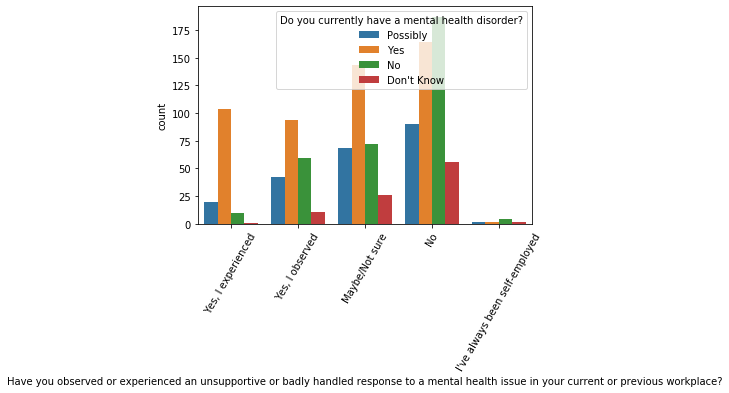

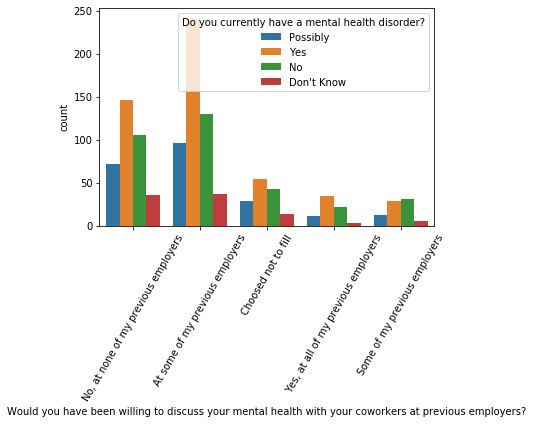

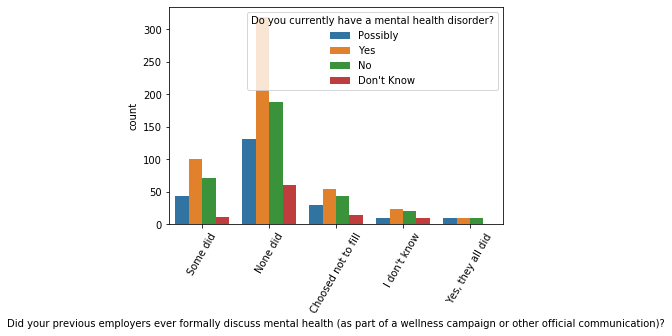

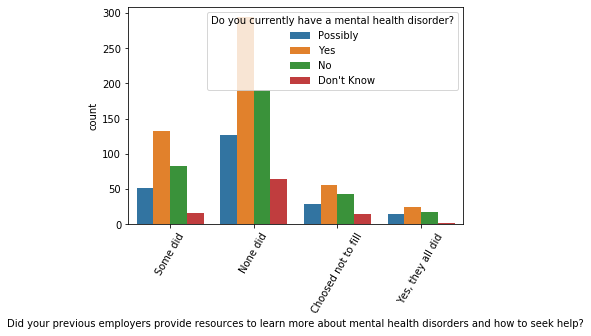

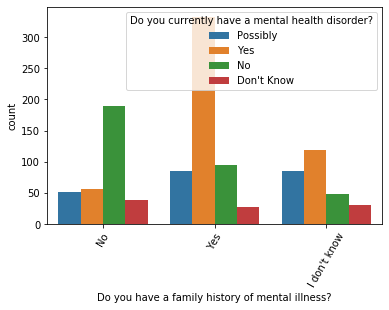

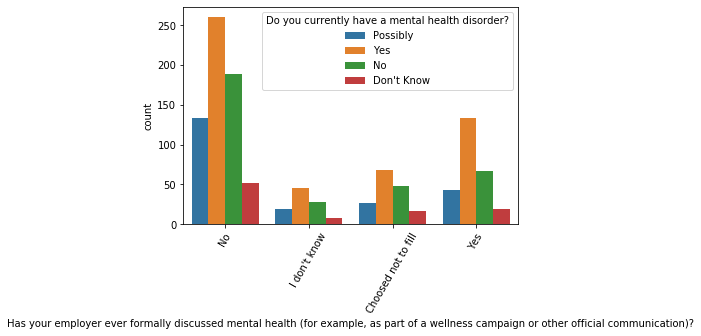

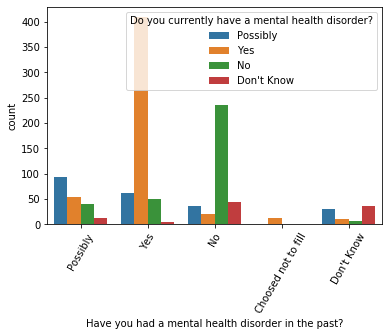

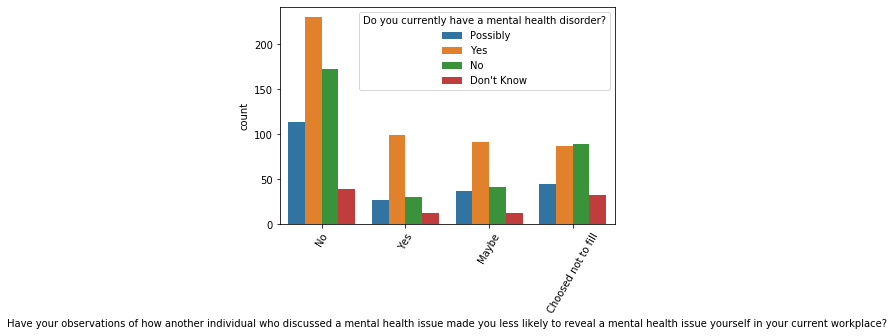

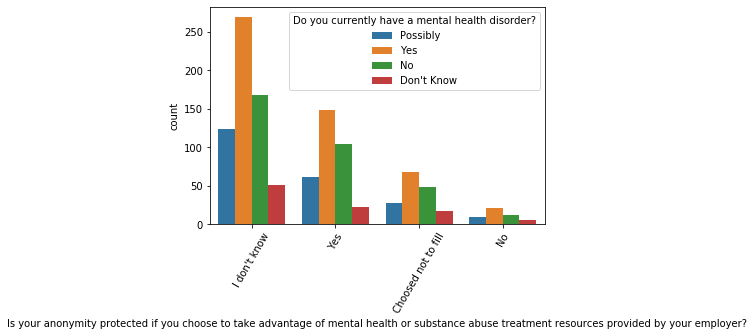

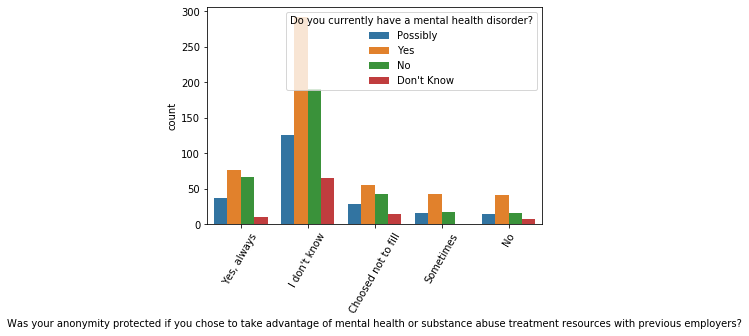

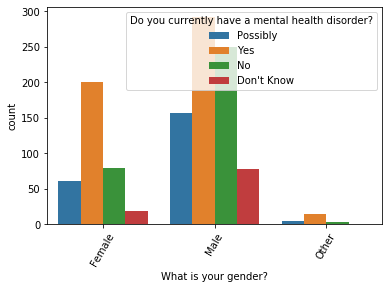

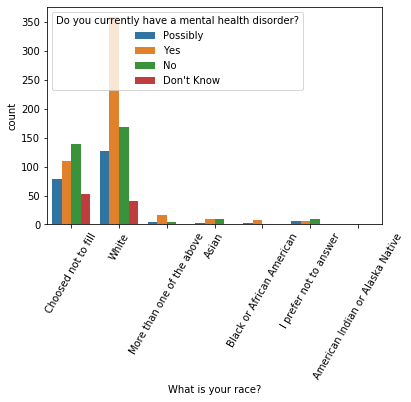

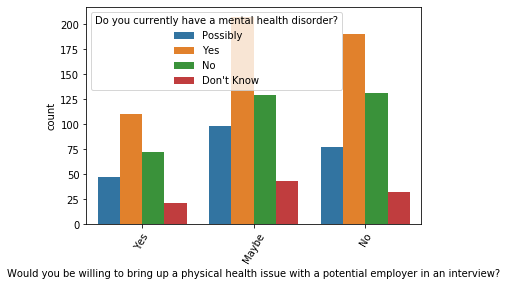

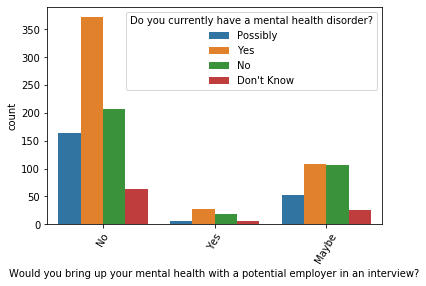

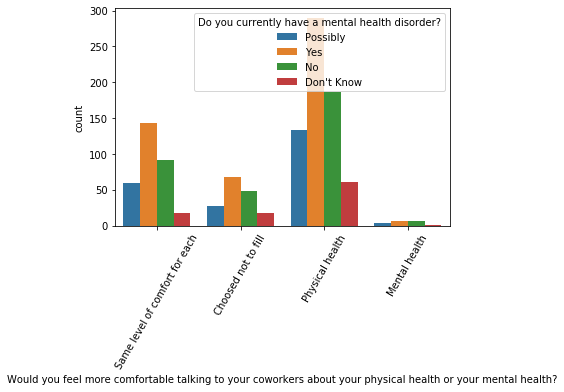

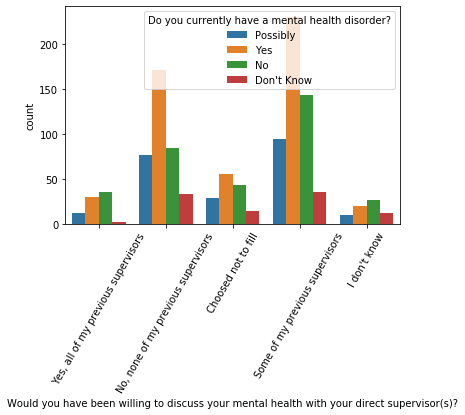

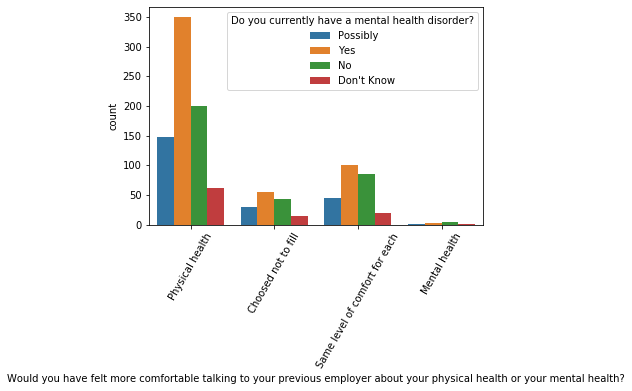

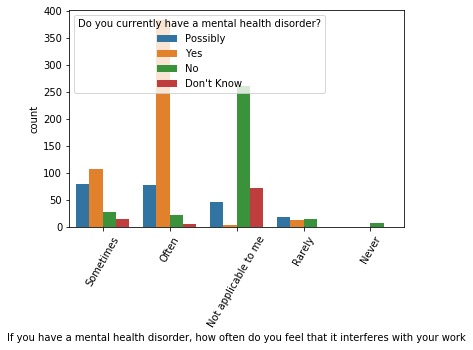

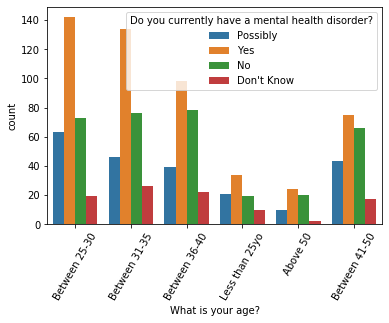

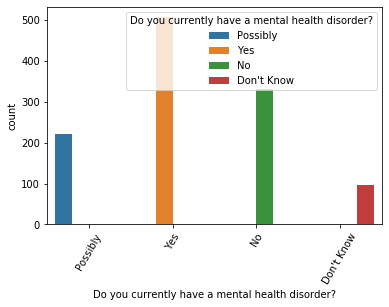

In [45]:
categorical_columns = dffinal.select_dtypes(include='O').columns
for item in categorical_columns:
    a= sns.countplot(data=dffinal, x=item , hue='Do you currently have a mental health disorder?')
    a.set_xticklabels(a.get_xticklabels(),rotation=60)
    plt.show()

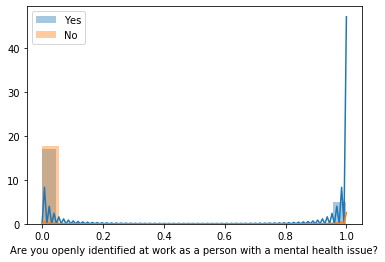

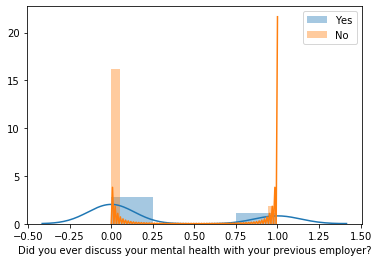

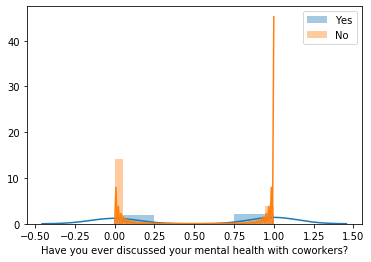

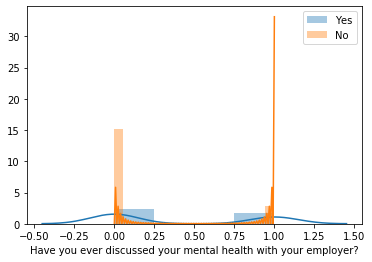

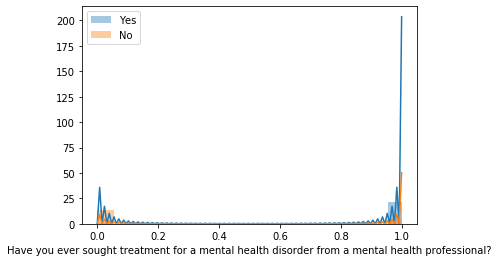

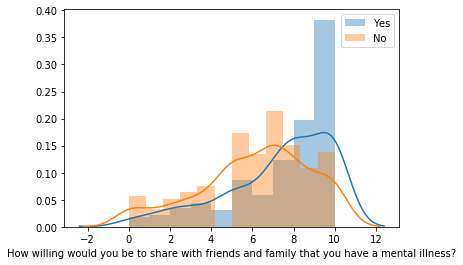

In [46]:
numeric_columns = dffinal.select_dtypes(exclude='O').columns
for item in numeric_columns:
    fig,ax = plt.subplots(nrows=1,ncols=1)
    sns.distplot(dffinal[dffinal['Do you currently have a mental health disorder?'] == 'Yes'][item] , ax=ax, label='Yes')
    sns.distplot(dffinal[dffinal['Do you currently have a mental health disorder?'] == 'No'][item] , ax=ax, label='No')
    plt.legend()
    plt.show()

# Picking best model

In [47]:
dffinal = dffinal.drop('What is your race?',axis=1)
x = pd.get_dummies(dffinal.drop('Do you currently have a mental health disorder?',axis=1),drop_first=True)
y = dffinal['Do you currently have a mental health disorder?'].map({'Yes' : 1,'No' : 0,'Possibly' :2,"Don't Know":3})

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
models = [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,GradientBoostingClassifier,SVC,KNeighborsClassifier]
models_name = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','SVC','KNeighborsClassifier']

In [49]:
data_score = []
for model,name in zip(models,models_name):
    score = cross_val_score(model(),x,y,cv=5)
    data_score.append([name,score.mean()])

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [50]:
df_score_cv = pd.DataFrame(data_score,columns=['Name','Score'])

In [51]:
df_score_cv

,Name,Score
0,LogisticRegression,0.727770
1,DecisionTreeClassifier,0.622264
2,RandomForestClassifier,0.693232
3,GradientBoostingClassifier,0.714786
4,SVC,0.717439
5,KNeighborsClassifier,0.657781


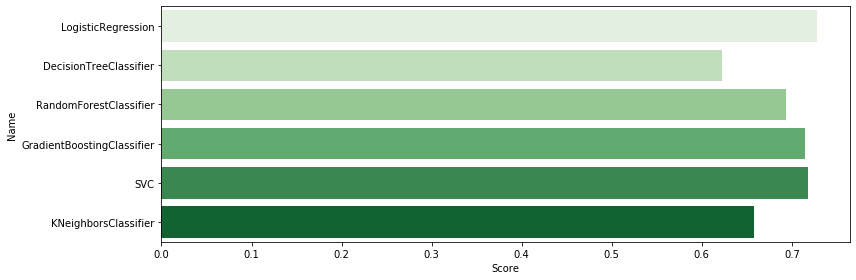

In [106]:
plt.figure(figsize=(12,4))
sns.barplot(data=df_score_cv,y='Name',x='Score',palette="Greens")
plt.tight_layout()


#### As the support vector classifier works by putting data points, above and below the classifying hyper plane there is no probabilistic explanation for the classification. So I won't use SVC

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y)
model = LogisticRegression()
model.fit(X_train,y_train)
pred= model.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76        93
           1       0.80      0.94      0.86       126
           2       0.63      0.40      0.49        48
           3       0.50      0.35      0.41        23

    accuracy                           0.75       290
   macro avg       0.67      0.61      0.63       290
weighted avg       0.73      0.75      0.73       290



D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## What so many variables, can PCA simplify them and make better accuracy?

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_cl

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

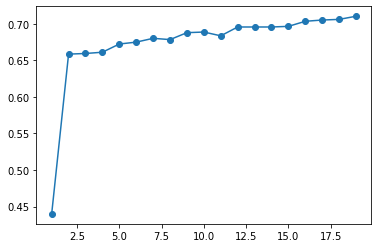

In [54]:
from sklearn.decomposition import PCA
cv_scores =[]
for item in range (1,20):
    x_pca = PCA(n_components=item).fit_transform(x)
    cv_mean = cross_val_score(LogisticRegression(),x_pca,y, cv=4).mean()
    cv_scores.append(cv_mean)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], cv_scores, marker='o')

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
x_pca_18 = pca.fit_transform(x)
x_pca_18= pd.DataFrame(x_pca_18,columns=['PCA 1','PCA 2','PCA 3','PCA 4','PCA 5','PCA 6','PCA 7','PCA 8','PCA 9','PCA 10','PCA 11','PCA 12','PCA 13','PCA 14','PCA 15','PCA 16','PCA 17','PCA 18'])
cv_score = cross_val_score(LogisticRegression(),x_pca_18,y, cv=4)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [56]:
cv_score.mean()

0.7113544276737064

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x_pca_18,y)
log_model_pca_18 = LogisticRegression().fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [58]:
prediction = log_model_pca_18.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.63      0.87      0.73        84
           1       0.85      0.87      0.86       134
           2       0.46      0.38      0.41        45
           3       1.00      0.04      0.07        27

    accuracy                           0.72       290
   macro avg       0.74      0.54      0.52       290
weighted avg       0.74      0.72      0.68       290



## What about XG Boost with Hyperparameter?

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [60]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score ,classification_report

In [61]:
parameters = {'n_estimator' : [10,50,100,200], 'learning_rate' : [0.1,0.15,0.25,0.5], 'max_depth' : [1,3,5,7]}
grid = GridSearchCV(XGBClassifier(),parameters,cv=3)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.25, 'max_depth': 1, 'n_estimator': 10}

In [62]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=101,test_size=0.2)

In [63]:
model = XGBClassifier(learning_rate= 0.25, max_depth= 1, n_estimator= 10)
model.fit(xtrain,ytrain)
pred= model.predict(xtest)
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75        72
           1       0.81      0.95      0.88       101
           2       0.59      0.51      0.55        43
           3       0.64      0.44      0.52        16

    accuracy                           0.76       232
   macro avg       0.71      0.66      0.67       232
weighted avg       0.75      0.76      0.75       232



In [64]:
feat_importance = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False).head(10)

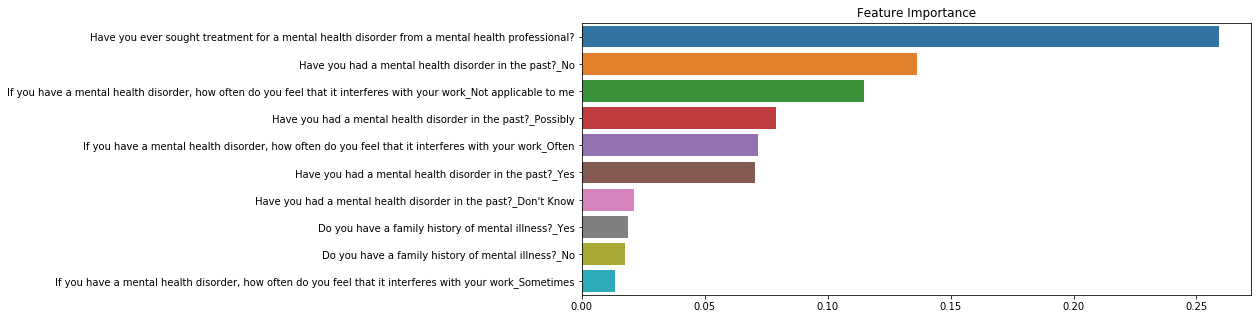

In [65]:
plt.figure(figsize=(12,5))
plt.title('Feature Importance')
sns.barplot(x=feat_importance.values,y=feat_importance.index)

## So shall we use PCA / XGboost/ Logres?
### Simplify target into 3 category instead of 4

In [66]:
for item in range(len(dffinal['Do you currently have a mental health disorder?'])):
    if (dffinal['Do you currently have a mental health disorder?'][item]=="Don't Know"):
       dffinal['Do you currently have a mental health disorder?'][item]='Possibly' 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [67]:
dffinal['Do you currently have a mental health disorder?'].value_counts()

Yes         507
No          332
Possibly    318
Name: Do you currently have a mental health disorder?, dtype: int64

In [68]:

x = pd.get_dummies(dffinal.drop('Do you currently have a mental health disorder?',axis=1),drop_first=True)
y = dffinal['Do you currently have a mental health disorder?'].map({'Yes' : 1,'No' : 0,'Possibly' :2})

## Also why don't we put Standard Scaler on?

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()

In [71]:
scaler_transformer =scaler.fit(x)

In [72]:
x_scaled = scaler_transformer.transform(x)

In [73]:
x_scaled = pd.DataFrame(x_scaled, columns= x.columns)

### Logistic regression with standard scaler and hyperparameter

In [74]:
parameters = {'C' : [0.001,0.01,0.1,1,10,100,1000], 'penalty' : ['l1', 'l2']}
grid = GridSearchCV(LogisticRegression(),parameters,cv=3)
grid.fit(x_scaled,y)
grid.best_params_

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


{'C': 0.01, 'penalty': 'l2'}

In [75]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,random_state=101,test_size=0.2)

In [76]:
model = LogisticRegression(C= 0.1, penalty= 'l2')
model.fit(xtrain,ytrain)
pred= model.predict(xtest)
print(classification_report(ytest,pred))
LR = classification_report(ytest,pred, output_dict=True)

              precision    recall  f1-score   support

           0       0.77      0.74      0.75        72
           1       0.83      0.95      0.88       101
           2       0.74      0.59      0.66        59

    accuracy                           0.79       232
   macro avg       0.78      0.76      0.77       232
weighted avg       0.79      0.79      0.79       232



D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### PCA with Standard Scaler

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_cl

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_cl

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_cl

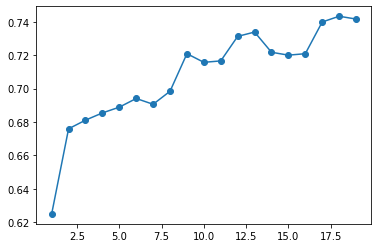

In [77]:
from sklearn.decomposition import PCA
cv_scores =[]
for item in range (1,20):
    x_pca = PCA(n_components=item).fit_transform(x_scaled)
    cv_mean = cross_val_score(LogisticRegression(),x_pca,y, cv=4).mean()
    cv_scores.append(cv_mean)
plt.plot([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], cv_scores, marker='o')

In [78]:
pca = PCA(n_components=19)
x_pca_19 = pca.fit_transform(x_scaled)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(x_pca_19,y)
log_model_pca_19 = LogisticRegression().fit(X_train,y_train)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [80]:
prediction = log_model_pca_19.predict(X_test)
print(classification_report(y_test,prediction))
PCA = classification_report(y_test,prediction, output_dict=True)

              precision    recall  f1-score   support

           0       0.69      0.74      0.72        80
           1       0.78      0.90      0.84       126
           2       0.66      0.48      0.55        84

    accuracy                           0.73       290
   macro avg       0.71      0.70      0.70       290
weighted avg       0.72      0.73      0.72       290



### XG Boost With Standard Scaler and Hyperparameter

In [81]:
parameters = {'n_estimator' : [10,50,100,200], 'learning_rate' : [0.1,0.15,0.25,0.5], 'max_depth' : [1,3,5,7]}
grid = GridSearchCV(XGBClassifier(),parameters,cv=3)
grid.fit(x_scaled,y)
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 1, 'n_estimator': 10}

In [82]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,random_state=101,test_size=0.2)

In [83]:
model = XGBClassifier(learning_rate= 0.1, max_depth= 1, n_estimator= 10)
model.fit(xtrain,ytrain)
pred= model.predict(xtest)
print(classification_report(ytest,pred))
XGB = classification_report(ytest,pred, output_dict=True)


              precision    recall  f1-score   support

           0       0.85      0.69      0.76        72
           1       0.80      0.97      0.88       101
           2       0.75      0.64      0.69        59

    accuracy                           0.80       232
   macro avg       0.80      0.77      0.78       232
weighted avg       0.80      0.80      0.80       232



In [84]:
LRs=pd.DataFrame(LR).transpose()
dfPCA=pd.DataFrame(PCA).transpose()
dfXGB=pd.DataFrame(XGB).transpose()
dfPCA =dfPCA[['f1-score']]
dfXGB =dfXGB[['f1-score']]
LR=LRs[['f1-score']]
result = pd.concat([dfPCA,dfXGB,LR], axis=1, sort=False)
result.columns=['f1-score PCA','f1-score XGBoost','f1-score LR']


In [85]:
result

,f1-score PCA,f1-score XGBoost,f1-score LR
0,0.715152,0.763359,0.751773
1,0.837037,0.878924,0.884793
2,0.551724,0.690909,0.660377
accuracy,0.731034,0.801724,0.793103
macro avg,0.701304,0.777731,0.765648
weighted avg,0.720771,0.795245,0.786440


In [86]:
feat_importance = pd.Series(model.feature_importances_,index=x_scaled.columns).sort_values(ascending=False).head(8)

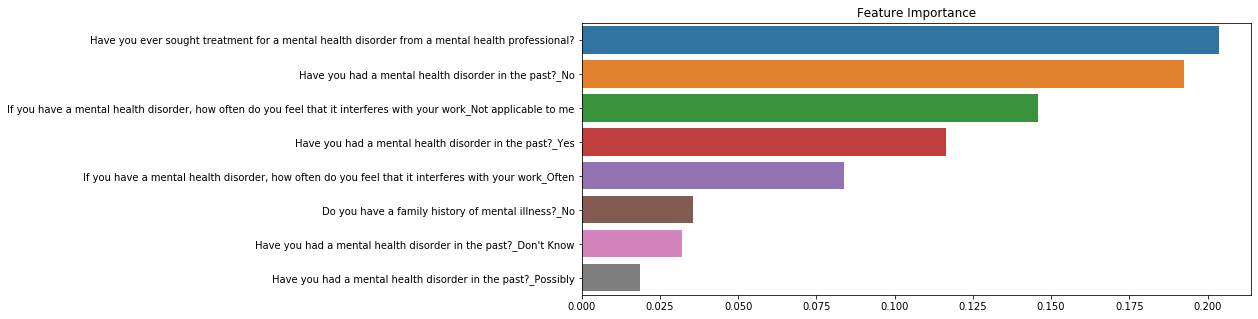

In [87]:
plt.figure(figsize=(12,5))
plt.title('Feature Importance')
sns.barplot(x=feat_importance.values,y=feat_importance.index)

## Export Model

In [88]:
import pickle

In [89]:
from sklearn.pipeline import Pipeline

In [90]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [91]:
x = dffinal.drop('Do you currently have a mental health disorder?',axis=1)
y = dffinal['Do you currently have a mental health disorder?']

In [92]:
pipe = Pipeline([
    ('OneHot',OneHotEncoder(drop='first')),
     ('scaler',StandardScaler()),
    ('model' , XGBClassifier(learning_rate= 0.1, max_depth= 1, n_estimator= 10))
])

In [93]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [94]:
# pipe.fit(X_train,y_train)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.

In [ ]:
# pickle.dump(pipe,open('pipe.sav','wb'))